## PHASE ONE DATA SCIENCE PROJECT

### Movie Industry Analysis

###### IMPORTING LIBRARIES

The following is a list of all the libraries that I will need in this project. I may need more libraries but these will get me started.

In [131]:
#Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

## exploring and cleaning bom.movie gross data set

In [3]:
# import bom.movie_gross.csv as df
bom_movie_gross = pd.read_csv('bom.movie_gross.csv/bom.movie_gross.csv')

# display the number of columns and rows
bom_movie_gross.shape

(3387, 5)

The data frame above contains 3387 rows and 5 columns

In [4]:
# preview the first five rows of the data set

bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# understanding the type of data types found in this dataframe
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [6]:
#displays random group of 10 rows within dataset
bom_movie_gross.sample(10)

,title,studio,domestic_gross,foreign_gross,year
599,Texas Killing Fields,Anch.,45500.0,912000,2011
2812,Ghost in the Shell (2017),Par.,40600000.0,129199999,2017
3307,Oh Lucy!,FM,375000.0,NaN,2018
239,Leaving,IFC,176000.0,893000,2010
981,Chasing Ice,SD,1300000.0,NaN,2012
28,Knight & Day,Fox,76400000.0,185500000,2010
1103,4:44: Last Day on Earth,IFC,17800.0,NaN,2012
2336,X-Men: Apocalypse,Fox,155400000.0,388500000,2016
859,The Master,Wein.,16399999.0,11900000,2012
1468,Paradise: Hope,Strand,6700.0,NaN,2013


In [7]:
# finding out if there is any missing value
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

After sampling the data i realized that there are some missing values. I decided to drop the entire column of foreign_gross because the same data can be found by feature engneering of in tn_movie budget.

In [8]:
    bom_movie_gross.dropna(subset=['studio', 'domestic_gross'], inplace=True)
    
    bom_movie_gross.drop('foreign_gross', axis=1, inplace=True)

In [9]:
bom_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

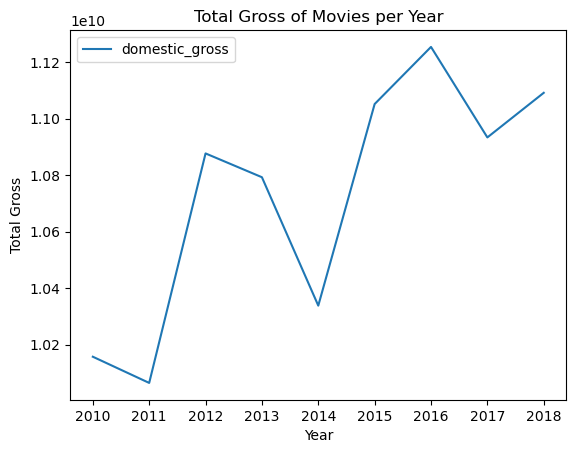

In [113]:
bom_movie_gross.groupby('year',).sum().sort_values(by = 'year', ascending = True).plot()
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.title('Total Gross of Movies per Year')
plt.show()

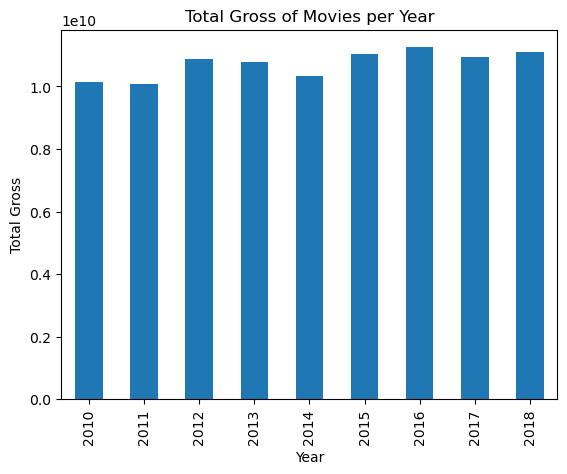

In [116]:

bom_movie_gross.groupby('year').sum().plot(kind='bar', legend=False)
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.title('Total Gross of Movies per Year')
plt.show()

## understanding  rt.movie_info data set

In [118]:
# import rt_movie_info.tsv as df
rt_movie_info = pd.read_table('rt.movie_info.tsv/rt.movie_info.tsv')

# display the number of columns and rows
rt_movie_info.shape

(1560, 12)

In [119]:
# preview the first five rows of the data set

rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [120]:
# understanding the type of data types found in this dataframe
rt_movie_info.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [121]:
#displays random group of 10 rows within dataset
rt_movie_info.sample(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1363,1760,Basketball superstar Michael Jordan and cartoo...,PG,Comedy|Kids and Family,Joe Pytka,Leo Benvenuti|Steve Rudnick|Timothy Harris|Her...,"Nov 15, 1996","Aug 27, 1997",NaN,NaN,88 minutes,NaN
169,223,"The Leningrad Cowboys, the self-proclaimed Wor...",NR,Documentary|Musical and Performing Arts,NaN,NaN,"Jul 2, 1994","Apr 26, 2005",NaN,NaN,54 minutes,NaN
1499,1931,Mark Felt - The Man Who Brought Down the White...,PG-13,Drama,Peter Landesman,Peter Landesman,"Sep 29, 2017","Jan 9, 2018",$,"766,428",NaN,Sony Pictures Classics
106,136,"In CASE 39, family services social worker Emil...",R,Horror|Mystery and Suspense,Christian Alvart,Ray Wright,"Oct 1, 2010","Jan 4, 2011",$,"13,248,477",109 minutes,Paramount Studios
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
1416,1825,"After losing contact with Earth, Astronaut Lee...",NR,Drama|Science Fiction and Fantasy,William Eubank,William Eubank,NaN,NaN,NaN,NaN,90 minutes,NaN
1202,1542,It's 1969. The conflict in Viet Nam has explod...,R,Horror|Mystery and Suspense,Jonathan Liebesman,Sheldon Turner,"Oct 6, 2006","Jan 16, 2007",$,"39,418,953",84 minutes,New Line Cinema
551,720,"In this Vegas-set crime comedy, a petty crook ...",NR,Classics|Comedy,William Castle,Ben Starr,"Mar 12, 1967","Jul 22, 2008",NaN,NaN,101 minutes,NaN
445,584,"In this crime drama, a bank clerk launches his...",NR,Drama|Mystery and Suspense,NaN,Warren Douglas,NaN,NaN,NaN,NaN,80 minutes,NaN
681,871,"""Another basement, another elevator...how can ...",R,Action and Adventure|Mystery and Suspense,Renny Harlin,NaN,"Jul 2, 1990","Mar 9, 1999",NaN,NaN,124 minutes,NaN


In [122]:
# understanding the type of data types found in this dataframe
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [123]:
#removing columns where nearly all data is missing
rt_movie_info = rt_movie_info.dropna(subset = ['synopsis', 'director', 
                               'writer', 'theater_date', 
                               'dvd_date', 'currency', 
                               'box_office', 'studio',
                              'runtime'
                              ], how = 'all')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1544,1983,This animated children's film spoofs the Sherl...,G,Action and Adventure|Animation|Kids and Family,Burny Mattinson|Ron Clements|John Musker|Dave ...,NaN,"Jul 2, 1986","Jul 23, 2002",NaN,NaN,74 minutes,NaN
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


## understanding  tmdb.movies.csv data set

In [25]:
# import tmdb.movies.csv as df
tmdb_movies = pd.read_csv('tmdb.movies.csv/tmdb.movies.csv')

# display the number of columns and rows
tmdb_movies.shape

(26517, 10)

In [26]:
# preview the first five rows of the data set
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [27]:
# understanding the type of data types found in this dataframe
tmdb_movies.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [31]:
#displays random group of 10 rows within dataset
tmdb_movies.sample(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
19325,19325,"[53, 10770]",452787,en,The Follower,0.848,2016-04-17,The Follower,4.3,7
2450,2450,"[10402, 35]",303914,en,Not Your Time,0.600,2010-09-24,Not Your Time,1.0,1
10180,10180,[10402],225887,en,Portnoy Sheehan MacAlpine Sherinian: Live in T...,0.600,2013-09-03,Portnoy Sheehan MacAlpine Sherinian: Live in T...,8.0,1
8821,8821,"[18, 10749, 35]",229749,en,When Calls the Heart,2.259,2013-10-05,When Calls the Heart,6.9,30
10882,10882,"[18, 27, 53]",259303,en,The Poisoning,0.600,2013-12-24,The Poisoning,3.5,2
12029,12029,[99],250745,en,Happy Valley,2.309,2014-11-14,Happy Valley,6.7,25
25545,25545,"[99, 27]",457775,en,The Devil and Father Amorth,1.850,2018-04-20,The Devil and Father Amorth,5.3,40
2496,2496,"[16, 10751]",45772,en,Gnomeo & Juliet,16.408,2011-02-11,Gnomeo & Juliet,5.8,1085
14334,14334,"[28, 35, 80]",268920,en,Hot Pursuit,9.607,2015-05-08,Hot Pursuit,5.6,1000
26011,26011,[18],508729,en,Broken Ceiling,0.906,2018-02-23,Broken Ceiling,6.0,1


In [42]:
#glimpse of the number of original movie language
tmdb_movies.original_language.value_counts()

original_language
en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: count, Length: 76, dtype: int64

In [32]:
# understanding the type of data types found in this dataframe
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [103]:
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [84]:
tmdb_movies['genre_ids'].value_counts()

genre_ids
[99]                       3700
[]                         2479
[18]                       2268
[35]                       1660
[27]                       1145
                           ... 
[37, 12]                      1
[10752, 878]                  1
[28, 53, 10749, 18, 35]       1
[99, 80, 53, 36]              1
[10751, 12, 28]               1
Name: count, Length: 2477, dtype: int64

In [85]:
tmdb_movies[tmdb_movies['genre_ids']== '[]']

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
517,517,[],31059,ru,Наша Russia: Яйца судьбы,3.867,2010-01-21,Nasha Russia: Yaytsa sudby,4.3,25
559,559,[],151316,en,Shrek’s Yule Log,3.424,2010-12-07,Shrek’s Yule Log,4.7,9
589,589,[],75828,en,Erratum,3.154,2010-09-16,Erratum,6.6,7
689,689,[],150782,en,Bikini Frankenstein,2.625,2010-01-18,Bikini Frankenstein,6.0,4
731,731,[],200946,en,Weakness,2.451,2010-10-24,Weakness,4.5,2
...,...,...,...,...,...,...,...,...,...,...
26495,26495,[],556601,en,Recursion,0.600,2018-08-28,Recursion,2.0,1
26497,26497,[],514045,en,The Portuguese Kid,0.600,2018-02-14,The Portuguese Kid,2.0,1
26498,26498,[],497839,en,The 23rd Annual Critics' Choice Awards,0.600,2018-01-11,The 23rd Annual Critics' Choice Awards,2.0,1
26500,26500,[],561932,en,Two,0.600,2018-02-04,Two,1.0,1


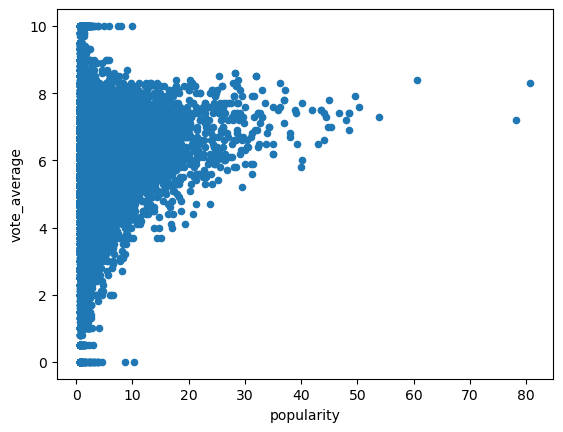

In [139]:
tmdb_movies.plot.scatter(x = 'popularity', y = 'vote_average')
plt.title = 'scatterplot of Movie popularity vs vote average'
plt.xlabel='popularity'
plt.ylabel='vote_average'

<Axes: >

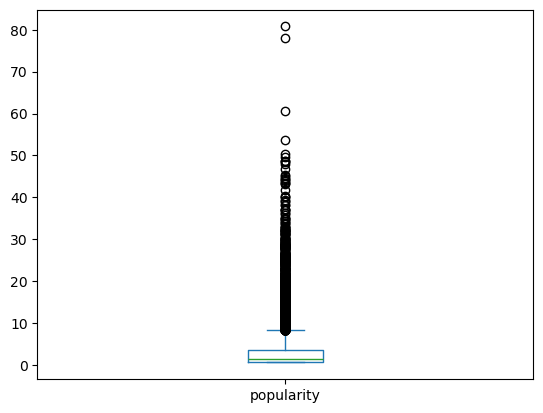

In [151]:
tmdb_movies['popularity'].plot.box()

<Axes: >

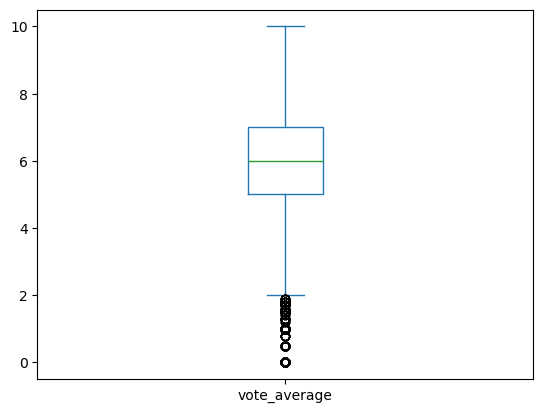

In [152]:
tmdb_movies['vote_average'].plot.box()

## understanding  tn_movie_budgets data set

In [67]:
# import tn.movie_budgets.csv as df
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv/tn.movie_budgets.csv')

# display the number of columns and rows
tn_movie_budgets.shape

(5782, 6)

In [68]:
# preview the first five rows of the data set
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [35]:
# understanding the type of data types found in this dataframe
tn_movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [36]:
#displays random group of 10 rows within dataset
tn_movie_budgets.sample(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
88,89,"Nov 23, 2011",Hugo,"$180,000,000","$73,864,507","$180,047,784"
4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806"
3034,35,"Nov 7, 2014",The Theory of Everything,"$15,000,000","$35,893,537","$123,327,692"
5746,47,"Aug 1, 1997",In the Company of Men,"$25,000","$2,883,661","$2,883,661"
3135,36,"Mar 14, 2008",Funny Games,"$15,000,000","$1,294,640","$8,200,127"
2184,85,"Jan 13, 2012",Contraband,"$25,000,000","$66,528,000","$98,406,855"
3845,46,"Sep 21, 2001",Glitter,"$8,500,000","$4,273,372","$4,273,372"
451,52,"Jul 11, 1997",Contact,"$90,000,000","$100,920,329","$165,900,000"
3452,53,"Oct 19, 2013",Supesu Batorushippu Yamato,"$12,000,000",$0,$0
2751,52,"Nov 24, 1993",The Nutcracker,"$19,000,000","$2,119,994","$2,119,994"


In [37]:
#checking if there is any missing values
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [39]:
#checking if there is any duplicates
tn_movie_budgets.drop_duplicates()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [69]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.strip('$')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.lstrip('$')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.lstrip('$')

In [52]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [71]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '')

In [73]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype('int')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype('int')

In [77]:
from decimal import Decimal
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].apply(lambda x: Decimal(x.replace(',', '')))

In [78]:
tn_movie_budgets['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [79]:
tn_movie_budgets['international_sales'] = tn_movie_budgets['worldwide_gross'] -tn_movie_budgets['domestic_gross']

In [80]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_sales
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365


In [108]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

<Axes: xlabel='production_budget', ylabel='worldwide_gross'>

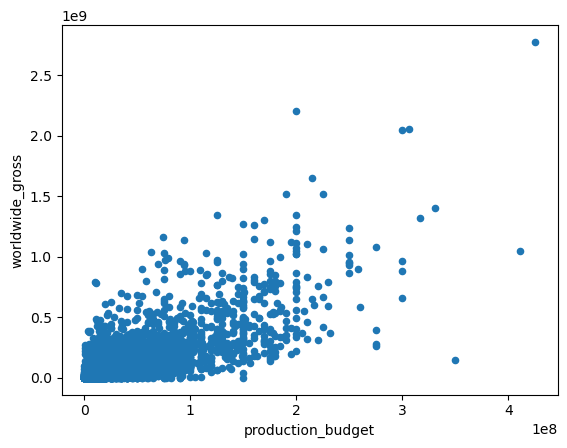

In [110]:
tn_movie_budgets.plot.scatter(x = 'production_budget', y = 'worldwide_gross')

In [111]:
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] -tn_movie_budgets['production_budget']

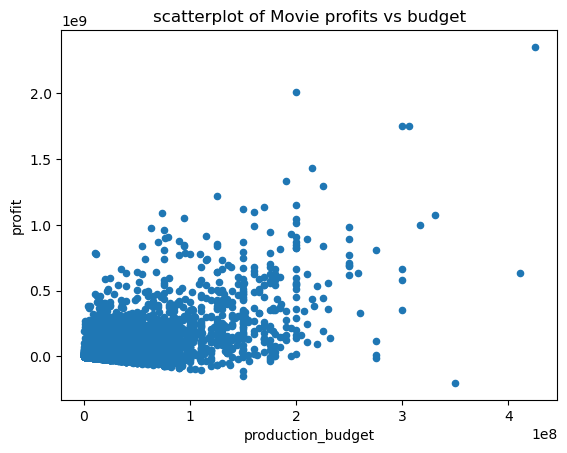

In [138]:
tn_movie_budgets.plot.scatter(x = 'production_budget', y = 'profit')
plt.title('scatterplot of Movie profits vs budget')
plt.ylabel('profit')
plt.xlabel='production_budget'

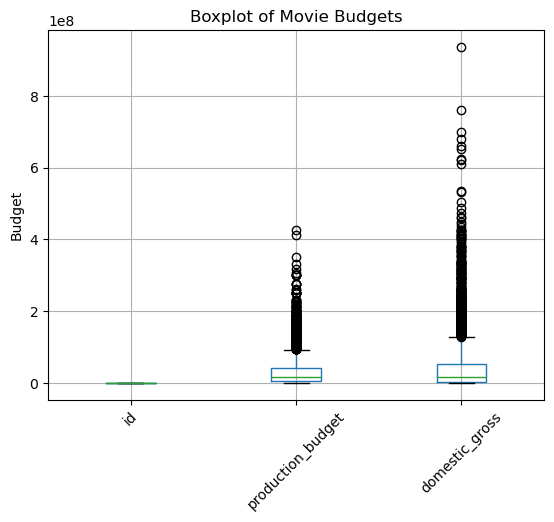

In [134]:
tn_movie_budgets.boxplot()
plt.title('Boxplot of Movie Budgets')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.show()